# INTERPOLAÇÃO E AJUSTE DE CURVAS


Interpolação e ajuste de curvas, são importantes recursos na vida de qualquer Cientista. A necessidade de encontrar a função que determina um conjunto de dados ou o valor entre dois pontos, é algo bastante comum na vida de um pesquisador. 

Interpolação é o método que permite construir um novo conjunto de dados a partir de um conjunto discreto de dados pontuais previamente conhecidos (Wikipedia). 

Ajuste de curvas é um método que consiste em encontrar uma curva que se ajuste a uma série de pontos e que possivelmente cumpra uma série de parâmetros adicionais. Ajuste de curvas pode envolver tanto interpolação,onde é necessário um ajuste exato aos dados, quanto suavização,na qual é construída uma função "suave" que se aproximadamente se ajusta aos dados. Outro assunto relacionado é análise de regressão, a qual se foca mais em questões da inferência estatística (Wikipedia).

## INTERPOLAÇÃO##

In [24]:
x = [0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0  8.0 9.0 10.0];
y = [0.0 0.5 4.3 7.0 8.0 6.0 6.9 10.0 9.0 9.5 8.2 ];

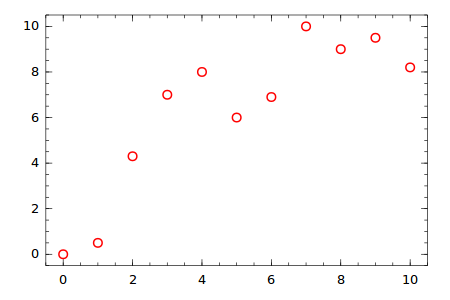

In [25]:
using Winston

Winston.plot(x,y,"or")

Melhorando o gráfico

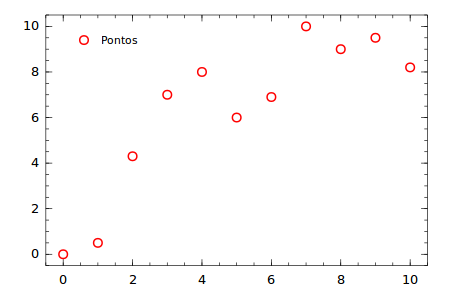

In [28]:
Winston.plot(x,y,"or")
legend(["Pontos"])

### PACOTE INTERPOLATIONS

A função interpolate do pacote Interpolations implementa vários métodos para realizar interpolação entre pontos, são eles:
* Linear: 
* Constant
* 

A função interpolate usa vetores unidimensionais do tipo Array{Tipo_dado,**1**}. Caso use vetor linha(bidimensional), há a necessidade de usar o comando **vec(dado)**. Sintaxe:
```julia
funcao_interp = interpolate((x_dados,), y_dados, Gridded(Metodo())); 
```
* x_dados: vetor unidimensional (Array{Tipo_dado,**1**}) de dados iniciais do eixo "x";
* y_dados: vetor unidimensional (Array{Tipo_dado,**1**}) de dados iniciais do eito "y";
* Metodo: método a ser utilizado (linear, spline..).

Para instalar use: Pkg.add("Interpolations")

In [29]:
using Interpolations

In [30]:
xx = vec(x); yy = vec(y);

In [31]:
# CUIDADO: VEJA QUE NO COMANDO interpolate((xx,)... TEMOS XX E VIRGULA

yinterp1= interpolate((xx,), yy, Gridded(Linear())); 

In [32]:
typeof(yinterp1)

Interpolations.GriddedInterpolation{Float64,1,Float64,Interpolations.Gridded{Interpolations.Linear},Tuple{Array{Float64,1}},0}

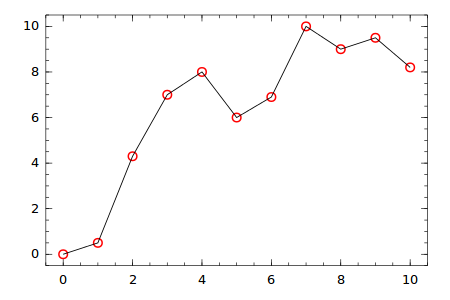

In [33]:
using Winston

Winston.plot(x,y,"or", 0:0.1:10, map(x1->yinterp1[x1],0:0.1:10))

In [34]:
yintC = interpolate((xx,), yy, Gridded(Constant())); 

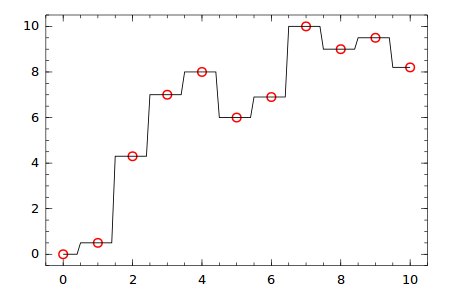

In [35]:
using Winston

Winston.plot(x,y,"or", 0:0.1:10, map(x1->yintC[x1],0:0.1:10) )

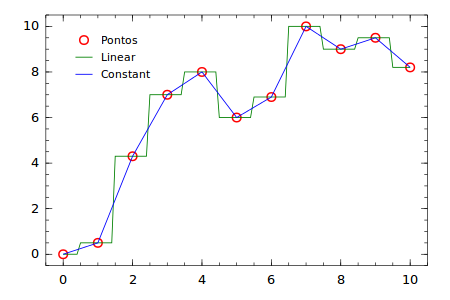

In [36]:
using Winston

Winston.plot(
x,y,"or", 
0:0.1:10, map(x1->yintC[x1],0:0.1:10),"g",
0:0.1:10, map(x1->yinterp1[x1],0:0.1:10),"b"
)

legend(["Pontos"; "Linear";"Constant"])

### PACOTE GRID 

A função CoordInterpGrid do pacote Grid implementa vários métodos para realizar interpolação entre pontos, são eles:
* InterpQuadratic: 
* InterpLinear: 
* 

A função CoordInterpGrid usa vetores unidimensionais do tipo Array{Tipo_dado,**1**}. Caso use vetor linha(bidimensional), há a necessidade de usar o comando **vec(dado)**. Sintaxe:
```julia
funcao_interp = CoordInterpGrid(x_dados_interp, y_dados, BCnil, Metodo); 
```
* x_dados: 
* y_dados:
* BCnil:
* Metodo:

Para instalar use: Pkg.add("Grid")

In [69]:
using Grid

In [73]:
x = [0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0  8.0 9.0 10.0];
y = [0.0 0.5 4.3 7.0 8.0 6.0 6.9 10.0 9.0 9.5 8.2 ];

x1 = 0.0:10.0

yint_G_Q = CoordInterpGrid(x1, vec(y), BCnil, InterpQuadratic); 

In [52]:
typeof(yint_G_Q)

Grid.CoordInterpGrid{Float64,1,Grid.BCnil,Grid.InterpQuadratic,Tuple{FloatRange{Float64}}}

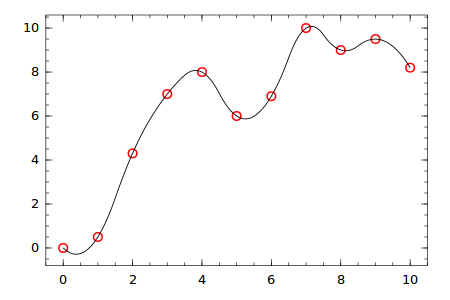

In [55]:
using Winston

Winston.plot(x,y,"or", 0:0.1:10, map(x1->yint_G_Q[x1],0:0.1:10) )

In [45]:
yint_G_L = CoordInterpGrid(x1,vec(y), BCnil, InterpLinear);

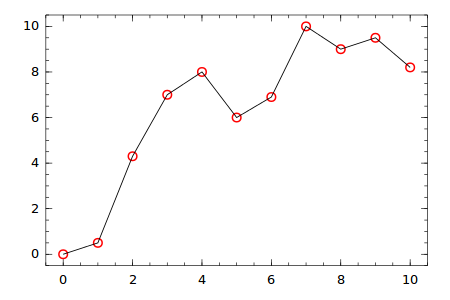

In [57]:
using Winston

Winston.plot(x,y,"or", 0:0.1:10, map(x1->yint_G_L[x1],0:0.1:10) )

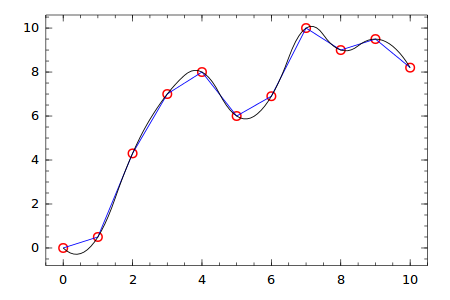

In [58]:
using Winston

Winston.plot(
x,y,"or", 
0:0.1:10, map(x1->yint_G_L[x1],0:0.1:10),"b",
0:0.1:10, map(x1->yint_G_Q[x1],0:0.1:10),"k"
)

### PACOTE NUMERICALMATH

A função **interp1d** do pacote NumericalMath implementa vários métodos para realizar interpolação entre pontos, são eles:
* Constant:  
* Linear  :
* Spline  :
* Nearest :
* Cubic   :

A função NumericalMath usa vetores unidimensionais do tipo Array{Tipo_dado,**1**}. Caso use vetor linha(bidimensional), há a necessidade de usar o comando **vec(dado)**
Sintaxe:
```julia
interp1d(x_dados,y_dados,x_dados_interp,method=:metodo)
```
* x_dados: vetor de dados iniciais do eixo "x";
* y_dados: vetor de dados iniciais do eito "y";
* x_dados_interp: vetor unidimensional(Array{Tipo_dado,1}) ;
* method: método a ser utilizado (linear, spline..).

Se não estiver instalado, use:Pkg.clone("https://github.com/hwborchers/NumericalMath.jl")

In [59]:
using NumericalMath 

In [60]:
xx = vec(x); yy = vec(y);

In [65]:
# Testando interpolação cubica para valor 2.3 

interp1d(xx,yy,2.3,method=:cubic)

5.255321746361746

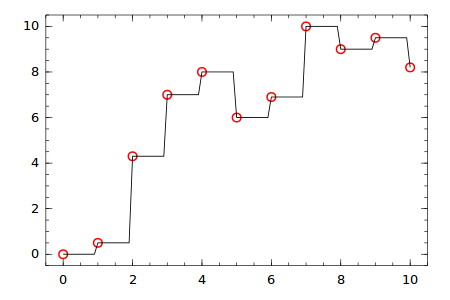

In [75]:
using Winston

Winston.plot(x,y,"or", 0:0.1:10, map(x1 -> interp1d(xx, yy, x1, method=:constant), 0:0.1:10) )

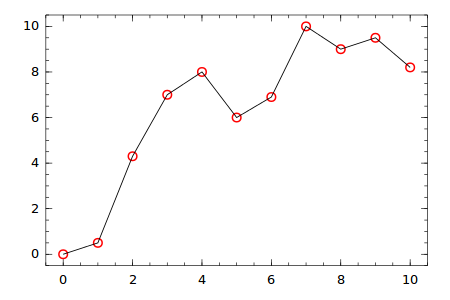

In [76]:
using Winston

Winston.plot(x,y,"or", 0:0.1:10, map(x -> interp1d(xx, yy, x, method=:linear), 0:0.1:10) )

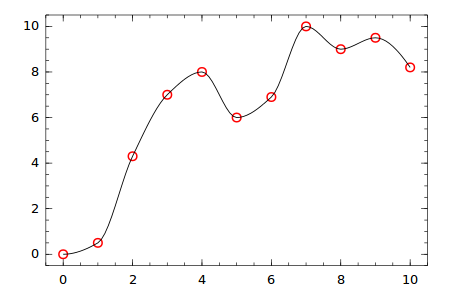

In [77]:
using Winston

Winston.plot(x,y,"or", 0:0.1:10, map(x -> interp1d(xx, yy, x, method=:cubic), 0:0.1:10) )

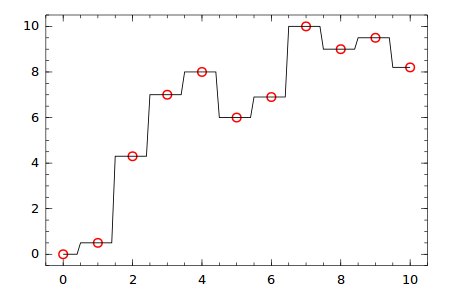

In [78]:
using Winston

Winston.plot(x,y,"or", 0:0.1:10, map(x -> interp1d(xx, yy, x, method=:nearest), 0:0.1:10) )

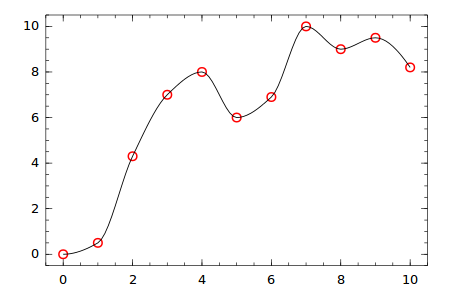

In [50]:
using Winston

Winston.plot(x,y,"or", 0:0.1:10, map(x -> pchip(xx ,yy, x), 0:0.1:10) )

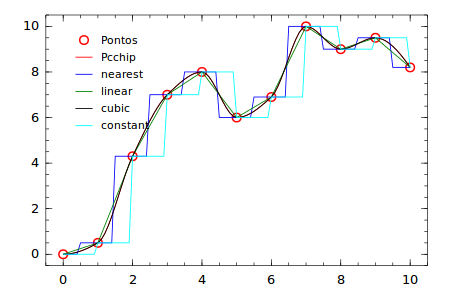

In [53]:
using Winston

Winston.plot(
x,y,"or", 
0:0.1:10,map(x->pchip(xx,yy,x),0:0.1:10),"r",
0:0.1:10,map(x->interp1d(xx,yy,x,method=:nearest),0:0.1:10),"b",
0:0.1:10,map(x->interp1d(xx,yy,x,method=:linear),0:0.1:10),"g",
0:0.1:10,map(x->interp1d(xx,yy,x,method=:cubic),0:0.1:10),"k",
0:0.1:10,map(x->interp1d(xx,yy,x,method=:constant),0:0.1:10),"c"
)
legend(["Pontos","Pcchip", "nearest","linear", "cubic","constant"])

## AJUSTE DE CURVAS

Ajuste de Curvas é um método que consiste em encontrar uma curva que se ajuste a uma série de pontos e que possivelmente cumpra uma série de parâmetros adicionais. Ajuste de curvas pode envolver tanto interpolação, onde é necessário um ajuste exato aos dados, quanto suavização, na qual é construída uma função "suave" que se aproximadamente se ajusta aos dados. Outro assunto relacionado é análise de regressão, a qual se foca mais em questões da inferência estatística. O ajuste de curvas é muito utilizado para, a partir de dados conhecidos, fazer-se extrapolações. Conhecida a equação da curva, pode-se determinar valores fora do intervalo conhecido. Fonte: wikipedia.

Pacotes importantes:
* **LsqFit**: O pacote LsqFit é uma pequena biblioteca que fornece alguns métodos de mínimos quadrados. A função LsqFif fornece dados sobre erros, jacobiano da solução e outros.


* **CurveFit**: O pacote CurveFit fornece funções que implementam alguns métodos dos mínimos quadrados. A função CurveFit simplesmente retorna os coeficientes dos modelos e não faz qualquer análise erro. 

### LINEAR SIMPLES

In [1]:
using DataFrames

In [186]:
tabela_dados_reta = DataFrames.readtable("dados_reta.csv");

In [187]:
# atraibuíndo às variáveis "x" e "y" os valores das colunas da tabela_dados_reta

x = Array(tabela_dados_reta[1]); 
y = Array(tabela_dados_reta[2]);

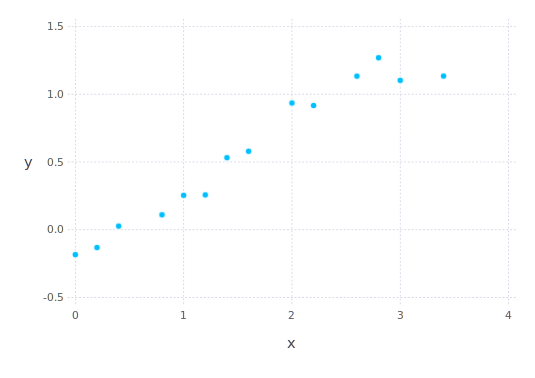

In [84]:
using Gadfly

Gadfly.plot(x=x,y=y)

De acordo com o gráfico, podemos identificar que os pontos determinam o modelo de uma reta. A função linear utilizada como modelo será na forma:

$ modelo = a_1*x + a_2$

#### COMANDO LINREG()

Para realizar uma regressão linear simples a fim de obter os coeficientes "a" e "b" da função $y = ax + b$, use:
```julia
coeficientes = linreg(x_dados,y_dados)
```
* x_dados
* y_dados

In [188]:
coef = linreg(x,y)

2-element Array{Float64,1}:
 -0.175732
  0.459962

In [189]:
ajuste_linear(x) = coef[2]*x + coef[1];

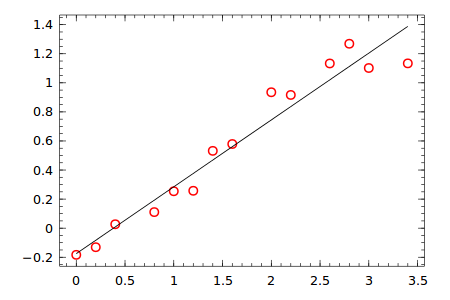

In [190]:
using Winston

Winston.plot(x,y,"or",x, ajuste_linear(x))

#### PACOTE LSQFIT

Sintaxe:
```julia
vetor_dados_ajuste = LsqFit.curve_fit(modelo_ajuste, x_dados, y_dados, [a_1, a_2])
```
* x_dados:
* y_dados:
* modelo_ajuste:
* a_1 e a_2:
* vetor_dados_ajuste :

Para instalar, use: Pkg.add("LsqFit")

In [88]:
using LsqFit

# Vetor "a" determina os coef iniciais da reta 
modelo_reta_lsqfit(x, a) = a[1].*x + a[2]

# valores iniciais dos coeficientes é o vetor coluna [0.5, 0.5]

reta = LsqFit.curve_fit(modelo_reta_lsqfit, x, y, [0.5, 0.5])

# reta.dof: graus de liberdade
# reta.param: coefientes da curva
# reta.resid: vetor de residuos de erro
# reta.jacobian: Jacobiano Estimado

# estimativa de erro dos coeficientes. 0.95 é 95% de confiança:
erros = estimate_errors(reta, 0.95);

In [182]:
# atualizando o vetor "a". Veja os coeficientes da curva

a = reta.param

2-element Array{Float64,1}:
  0.459962
 -0.175732

In [90]:
# atualizando o modelo com os dados do vetor "a"

modelo_reta_lsqfit(x, a) = a[1].*x + a[2]

modelo_reta_lsqfit (generic function with 1 method)

In [185]:
# testando o modelo de ajuste para x = 0

modelo_reta_lsqfit(0, a)

0.49428394588520924

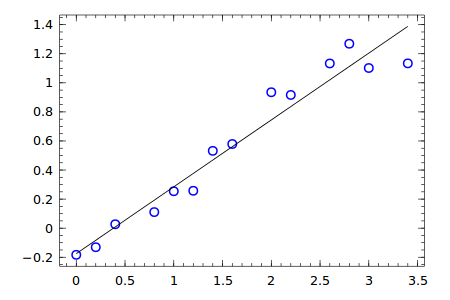

In [92]:
using Winston

Winston.plot(x, y, "ob",x,modelo_reta_lsqfit(x,a))

O "modelo" reta, é um polinômio na forma de vetor contendo o valor de a = 0.45996 e b= -0.17573

#### PACOTE CURVEFIT

Sintaxe:
```julia
Funcao_modelo = CurveFit.curve_fit(CurveFit.LinearFit, x_dados, y_dados)
```
* x_dados:
* y_dados:
* CurveFit.LinearFit:
* Funcao_modelo

Se tiver instalado use: Pkg.add("CurveFit")

In [24]:
using CurveFit

In [48]:
modelo_reta_curvefit = CurveFit.curve_fit(CurveFit.LinearFit, x, y)

CurveFit.LinearFit{Float64}([-0.17573217249621112,0.4599622661497015])

In [49]:
# testando o modelo de ajuste para x = 1

modelo_reta_curvefit(1)

0.2842300936534904

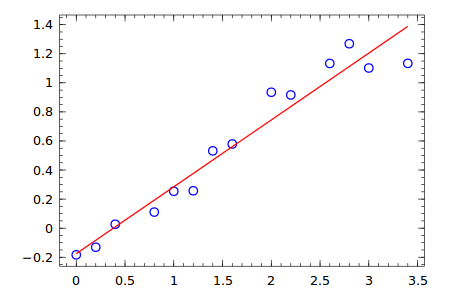

In [50]:
using Winston

Winston.plot(x, y, "ob", x, modelo_reta_curvefit(x), "r-", linewidth=3)

** Juntando todos os plots **

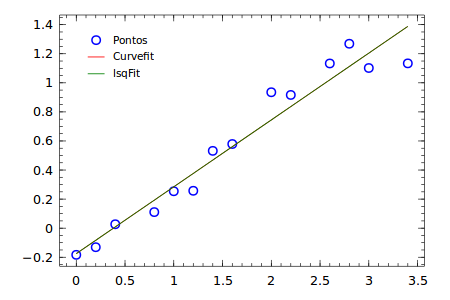

In [55]:
Winston.plot(x, y, "ob", x, modelo_reta_curvefit(x), "r-",x,modelo_reta_lsqfit(x,a),"g-" )
Winston.legend(["Pontos","Curvefit","lsqFit"])

### POLINOMIAL (grau > 1) ###

ATENÇÃO! É importante resetar as variaveis antes de usar os outros modelos de ajuste de curvas, pois as constantes a,b,c são as mesmas em todos os modelos

In [93]:
using DataFrames

In [171]:
tabela_dados_parabola = readtable("dados_parabola.csv");

In [172]:
# atraibuíndo às variáveis "x" e "y" os valores das colunas da tabela_dados_parabola

x = Array(tabela_dados_parabola[1]); 
y = Array(tabela_dados_parabola[2]);

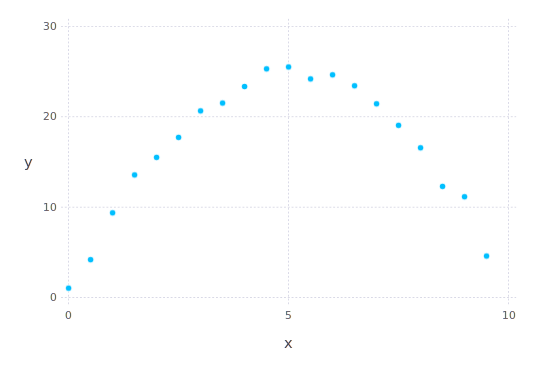

In [173]:
using Gadfly

Gadfly.plot(x=x,y=y)

De acordo com o gráfico, podemos identificar que os pontos determinam o modelo de uma curva polinomial(parábola). A função polinomial utilizada como modelo será na forma:

$ modelo = a_1*x^2 + a_2*x + a_3$

#### PACOTE LSQFIT

Sintaxe:
```julia
vetor_dados_ajuste :LsqFit.curve_fit(modelo_ajuste, x_dados, y_dados, [a_1, a_2, a_3])
```
* x_dados:
* y_dados:
* modelo_ajuste:
* a_1 , a_2 , a_3:
* vetor_dados_ajuste :

In [174]:
using LsqFit

# Vetor "a" determina os coef iniciais da curva 
modelo_curva_lsqfit(x, a) = a[1].*x.^2 + a[2].*x + a[3]

# valores iniciais dos coeficientes é o vetor coluna [-0.5, 0.5, 0.5]

curva = LsqFit.curve_fit(modelo_curva_lsqfit, x, y, [0.5, 0.5, 0.5])

# curva.dof: graus de liberdade
# curva.param: coefientes da curva
# curva.resid: vetor de residuos de erro
# curva.jacobian: Jacobiano Estimado

# estimativa de erro dos coeficientes. 0.95 é 95% de confiança:
erros = estimate_errors(curva, 0.95);

In [175]:
# atualizando o vetor "a". Veja os coeficientes da curva
a = curva.param

3-element Array{Float64,1}:
 -0.967694
  9.76314 
  0.259157

In [184]:
# atualizando o modelo com os dados do vetor "a"

modelo_curva_lsqfit(x, a) = a[1].*x.^2 + a[2].*x + a[3]

modelo_curva_lsqfit (generic function with 1 method)

O "modelo_curva_lsqfit", é um polinômio na forma de vetor contendo o valor de a = -0.96769 , b= 9.76314 e c = 0.25916

In [177]:
# testando o modelo de ajuste para x = 0

modelo_curva_lsqfit(0, a)

0.2591565191242925

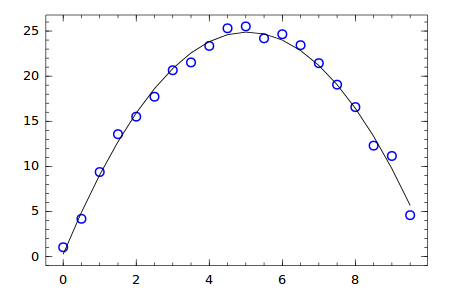

In [178]:
using Winston

#plotando o gráfico: a função modelo receberá os dados do vetor de dados "x" 
# e sustituirá a variável "Xm" pelos valores de "x"

Winston.plot(x, y, "ob", x , modelo_curva_lsqfit(x, a))

#### PACOTE CURVEFIT

Sintaxe:
```julia
Funcao_Modelo = CurveFit.curve_fit(CurveFit.Poly, x_dados, y_dados,grau)
```
* x_dados:
* y_dados:
* CurveFit.LinearFit:
* Grau:

In [104]:
using CurveFit

In [110]:
modelo_curva_curvefit = CurveFit.curve_fit(CurveFit.Poly, x, y,2)

Poly(0.2591565192254493 + 9.7631398653728x - 0.9676935282328346x^2)

O "modelo_curva_curvefit", é um polinômio na forma de vetor contendo o valor de a = -0.96769 , b= 9.76314 e c = 0.25916

In [112]:
# testando o modelo de ajuste para x = 0

modelo_curva_curvefit(0)

0.2591565192254493

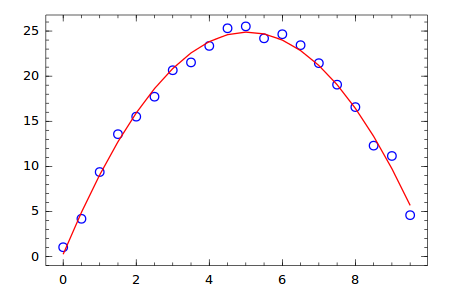

In [114]:
using Winston

Winston.plot(x, y, "ob", x, modelo_curva_curvefit(x), "r-", linewidth=3)

** Juntando todos os plots **

O ajuste do pacote curvefit e do pacote lsqfit concordam entre si, enquanto o ajuste do modelo caseira diverge

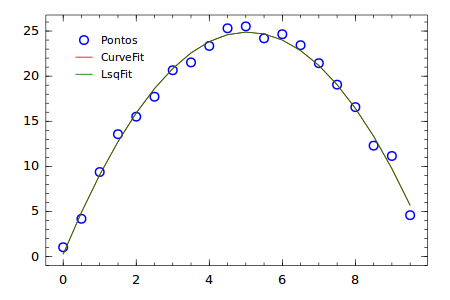

In [115]:
Winston.plot(
x, y, "ob", 
x, modelo_curva_curvefit(x) , "r-",
x, modelo_curva_lsqfit(x,a),"g-"
)

Winston.legend(["Pontos"; "CurveFit"; "LsqFit"])

### NÃO POLINOMIAL ###

![](funcoes-ajustes-curvas.png)

ATENÇÃO! É importante resetar as variaveis antes de usar os outros modelos de ajuste de curvas, pois as constantes a,b,c são as mesmas em todos os modelos

In [191]:
using DataFrames

tabela_dados_senoide = readtable("dados_senoide.csv");

In [192]:
# atraibuíndo às variáveis "x" e "y" os valores das colunas da tabela_dados_senoide

x = Array(tabela_dados_senoide[1]); 
y = Array(tabela_dados_senoide[2]);

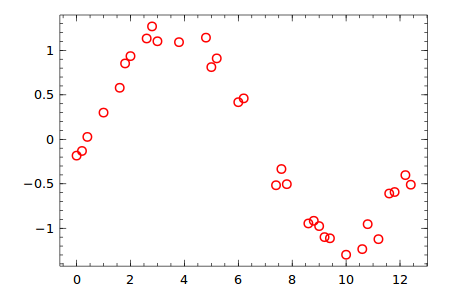

In [193]:
using Winston

Winston.plot(x,y,"or")

De acordo com o gráfico, podemos identificar que os pontos determinam o modelo de uma senóide. A função senóide utilizada como modelo será na forma:

$ modelo = a_1*sin( a_2*x + a_3)$

#### PACOTE LSQFIT

Sintaxe:
```julia
vetor_dados_ajuste = LsqFit.curve_fit(modelo_ajuste, x_dados, y_dados, [a_1, a_2, a_3])
```
* x_dados:
* y_dados:
* modelo_ajuste:
* a_1 , a_2 , a_3:
* vetor_dados_ajuste :

In [194]:
using LsqFit

# Vetor "a" determina os coef iniciais modelo não polinomial
modelo_naopoli_lsqfit(x, a) = a[1].*sin( a[2].*x + a[3] );

# valores iniciais dos coeficientes é o vetor coluna [-0.5, 0.5, 0.5]

naopoli = LsqFit.curve_fit(modelo_naopoli_lsqfit, x, y, [0.5, 0.5, 0.5])

# naopoli.dof: graus de liberdade
# naopoli.param: coefientes da curva
# naopoli.resid: vetor de residuos de erro
# naopoli.jacobian: Jacobiano Estimado

# estimativa de erro dos coeficientes. 0.95 é 95% de confiança:

erros = estimate_errors(naopoli, 0.95);

In [195]:
# atualizando o vetor "a". Veja os coeficientes do modelo não polinomial

a = naopoli.param

3-element Array{Float64,1}:
  1.19211 
  0.494284
 -0.198754

In [196]:
# atualizando o modelo com os dados do vetor "a"

modelo_naopoli_lsqfit(x, a) = a[1].*sin( a[2].*x + a[3] )

modelo_naopoli_lsqfit (generic function with 1 method)

In [197]:
# testando o modelo de ajuste para x = 0

modelo_naopoli_lsqfit(0, a)

-0.23537933974411732

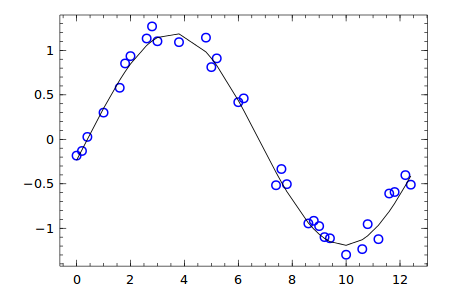

In [198]:
using Winston
Winston.plot(x, y, "ob",x,modelo_naopoli_lsqfit(x, a))

#### PACOTE CURVEFIT

Sintaxe:
```julia
coef,converg,iteracoes = CurveFit.nonlinear_fit(xy,modelo,a,eps,maxiter);
```
* xy:
* a :
* Modelo: 
* CurveFit.LinearFit:
* Eps:
* maxinter:
* coef,converg,iteracoes:

In [199]:
using CurveFit

In [200]:
a = [0.5, 0.5, 0.5]
eps = 0.0000000001
maxiter= 200.0

xy = [x y]

modelo_naopoli_curvefit(x,a) = x[2] - a[1]*sin(a[2]*x[1] + a[3])

coef,converg,iteracoes = CurveFit.nonlinear_fit(xy,modelo_naopoli_curvefit,a,eps,maxiter);

In [201]:
# coeficientes do modelo não polinomial

coef

3-element Array{Float64,1}:
  1.19211 
  0.494284
 -0.198754

In [156]:
# atualizando o modelo

a = coef

modelo_naopoli_curvefit(x,a) =  a[1].*sin(a[2].*x + a[3]);

In [157]:
# testando o modelo de ajuste para x = 0

modelo_naopoli_curvefit(0,a)

-0.23537934615430828

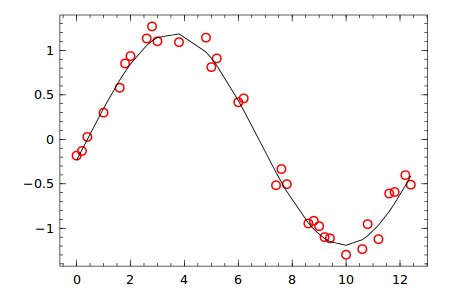

In [158]:
using Winston

Winston.plot(x, y, "or", x , modelo_naopoli_curvefit(x,a))

** Juntando todos os plots **

O ajuste do pacote curvefit e do pacote lsqfit concordam entre si

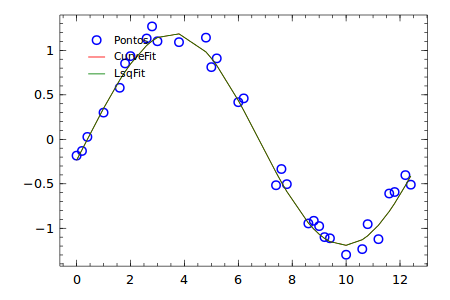

In [159]:
Winston.plot(
x, y, "ob", 
x, modelo_naopoli_curvefit(x,a), "r-",
x, modelo_naopoli_lsqfit(x,a) ,"g-"
)
Winston.legend(["Pontos"; "CurveFit"; "LsqFit"])